# Kalorimetrie Laborversuch

Author: Maximilian Groß

Datum: 22.11.2023

Gruppe: 87

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie genau lassen sich die Wärmekapazitäten der Proben mit diesem Prüfstand messen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Nutzen Sie hier Ihr eigenes Bild.


Der Versuchsaufbau beinhaltet das Kalorimeter mit Magnetrührgerät und das Wasserbad mit Sous-Vide Stab. Im Kalorimeter befinden sich drei Temperatursensoren, im Wasserbad ein Sensor und am ITEM Profil ebenfalls ein Sensor um die Umgebungstemperatur zu messen. Zunächst wurde die Kalorimeterkonstante bestimmt indem für 180s das Kalorimeter mittels der darin befindlichen Heizspule erwärmt wurde. Dabei wurde die Umgebungs- und Kalorimetertemperatur bestimmt. Anschließend wurden die Versuche mit den Proben durchgeführt. Dazu wurden die drei Proben im Wasserbad zunächst erwärmt. Danach wurden die Proben nacheinander im Kalorimeter plaziert und dabei die Temperaturmessung durchgeführt. Vor jeder Probe wurde das Wasser im Kalorimeter ausgetauscht. Während der Messung wurde das Kalorimeter mit Deckel verschlossen um Wärmeverluste an die Umgebung zu minimieren.

<img src="figures/my_img.jpg" width="800">


## Versuchsauswertung

In [42]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility
from functions import get_id_from_setup

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [43]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
import get_directory
importlib.reload(get_directory)

import os

dir_path = get_directory.get_directory()
h5path = os.path.join(dir_path,'data/kalorimeter_konstante/kalorimeter_konstante.h5')
# DONE #

In [44]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(h5path,'RawData')

# DONE #

In [45]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0,1,2]
index_environment = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [46]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter[0]:index_calorimeter[-1]+1])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_environment[0]])

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

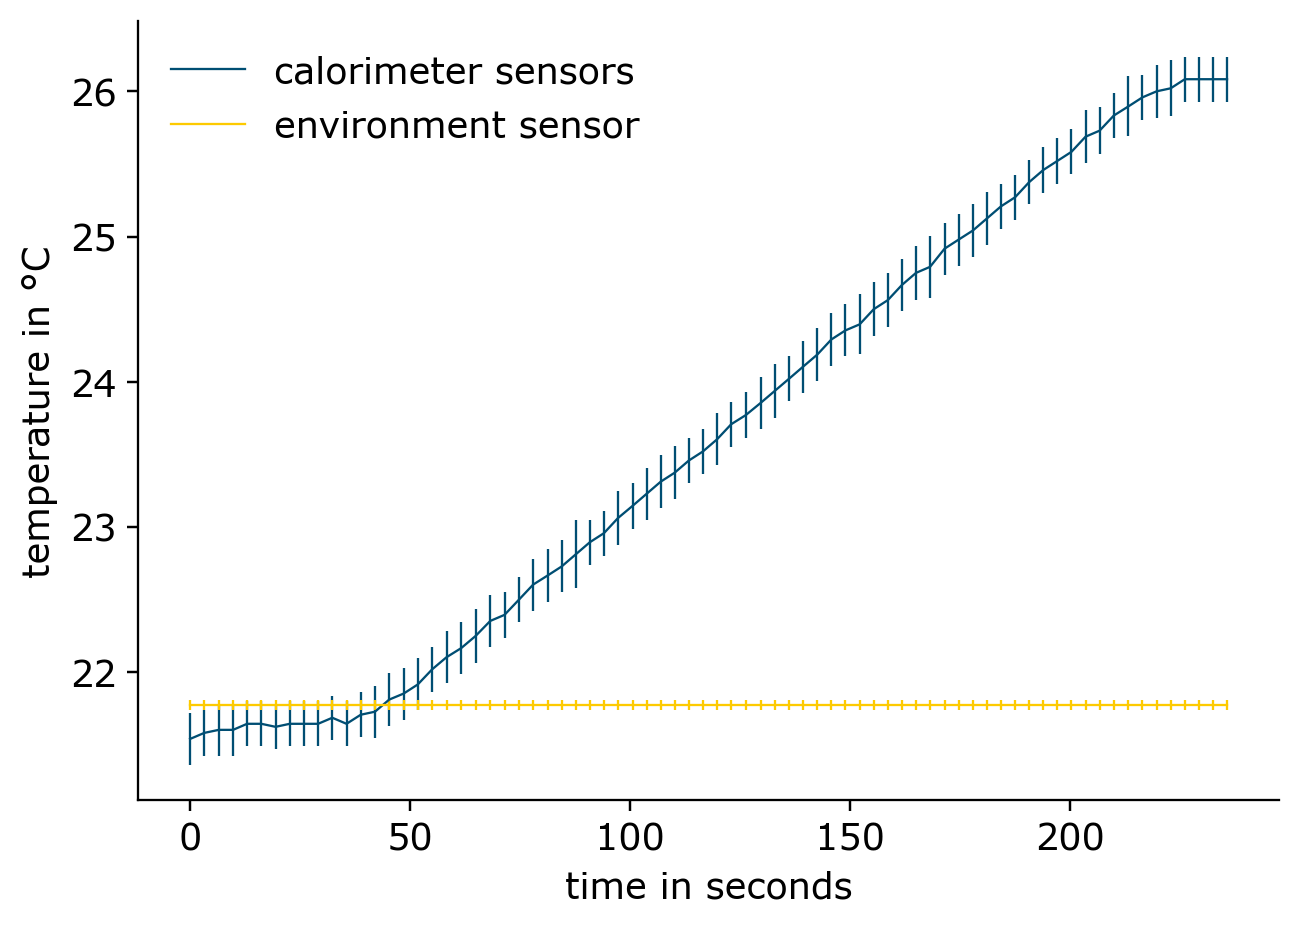

In [47]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting
time = data_dict['timestamp']


utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment],time[0],['calorimeter sensors','environment sensor'],'time in seconds','temperature in °C')

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [48]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.
datasheets_path = os.path.join(dir_path,'datasheets')
calorimeter_path = os.path.join(dir_path,'data/kalorimeter_konstante/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json')
id = get_id_from_setup.get_id_from_setup(calorimeter_path)


water_mass = m_json.get_json_entry(datasheets_path,id,['calorimeter','medium','mass','value'])

# DONE #

In [49]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

current = None
heat_time = None
voltage = None

data = h5.File(h5path,'r')
group = data['RawData']

for subgroup in group:
    try:
        current = group[subgroup]['Current'][()]
        heat_time = group[subgroup]['Heat time'][()]
        voltage = group[subgroup]['Voltage'][()]
    
    except KeyError:
            continue


# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kaloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [50]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
temperature_data = mean_std_calorimeter[0]
temperature_end, temperature_start = utility.get_start_end_temperature(temperature_data) 

print(temperature_end,temperature_start)

# DONE #

26.059027777777775 21.59166666666667


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [51]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = voltage*current*heat_time/(temperature_end-temperature_start)


# DONE #

#### (Vii) Ergebnis

In [52]:
calorimeter_const

1934.0276698274542

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [53]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = os.path.join(dir_path,'data/pdc014/pdc014.h5')

# DONE #

In [54]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1,'RawData')

# DONE #

In [55]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [56]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter[0]:index_calorimeter[-1]+1])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env[0]])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath[0]])

# DONE #

#### (iii) Daten ploten

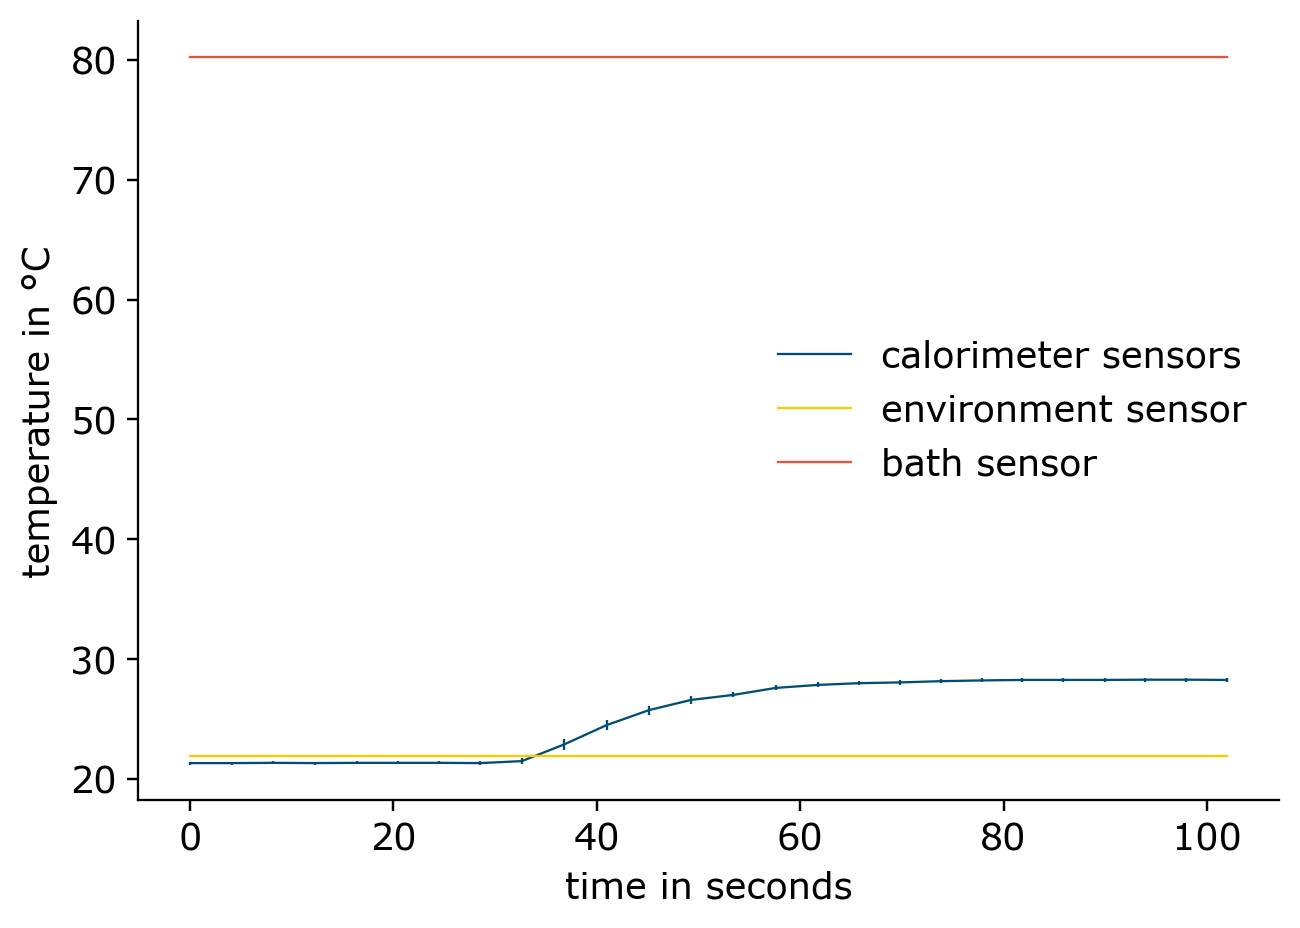

In [57]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
time = data_dict['timestamp']

utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment,mean_std_heater],time[0],['calorimeter sensors','environment sensor','bath sensor'],'time in seconds','temperature in °C')

# DONE #

#### (iv) Metadaten auslesen

In [58]:
# TODO: Read mass of the sample from the metadata of the experiment.
datasheets_path = os.path.join(dir_path,'datasheets')
probe_path = os.path.join(dir_path,'data/pdc014/probe_PDC014_1ee57b3a-345d-6fa4-90e6-2a350e5fc61f.json')
id = get_id_from_setup.get_id_from_setup(probe_path)

sample_mass = m_json.get_json_entry(datasheets_path,id,['probe','mass','value'])*0.001

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [59]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0]) 

# DONE #

In [60]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][0:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [61]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [62]:
sample_heat_capa

380.92212238646454

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [63]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = os.path.join(dir_path,'data/pdc016/pdc016.h5')

# DONE #

In [64]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2,'RawData')

# DONE #

In [65]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [66]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter[0]:index_calorimeter[-1]+1])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env[0]])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath[0]])

# DONE #

#### (iii) Daten ploten

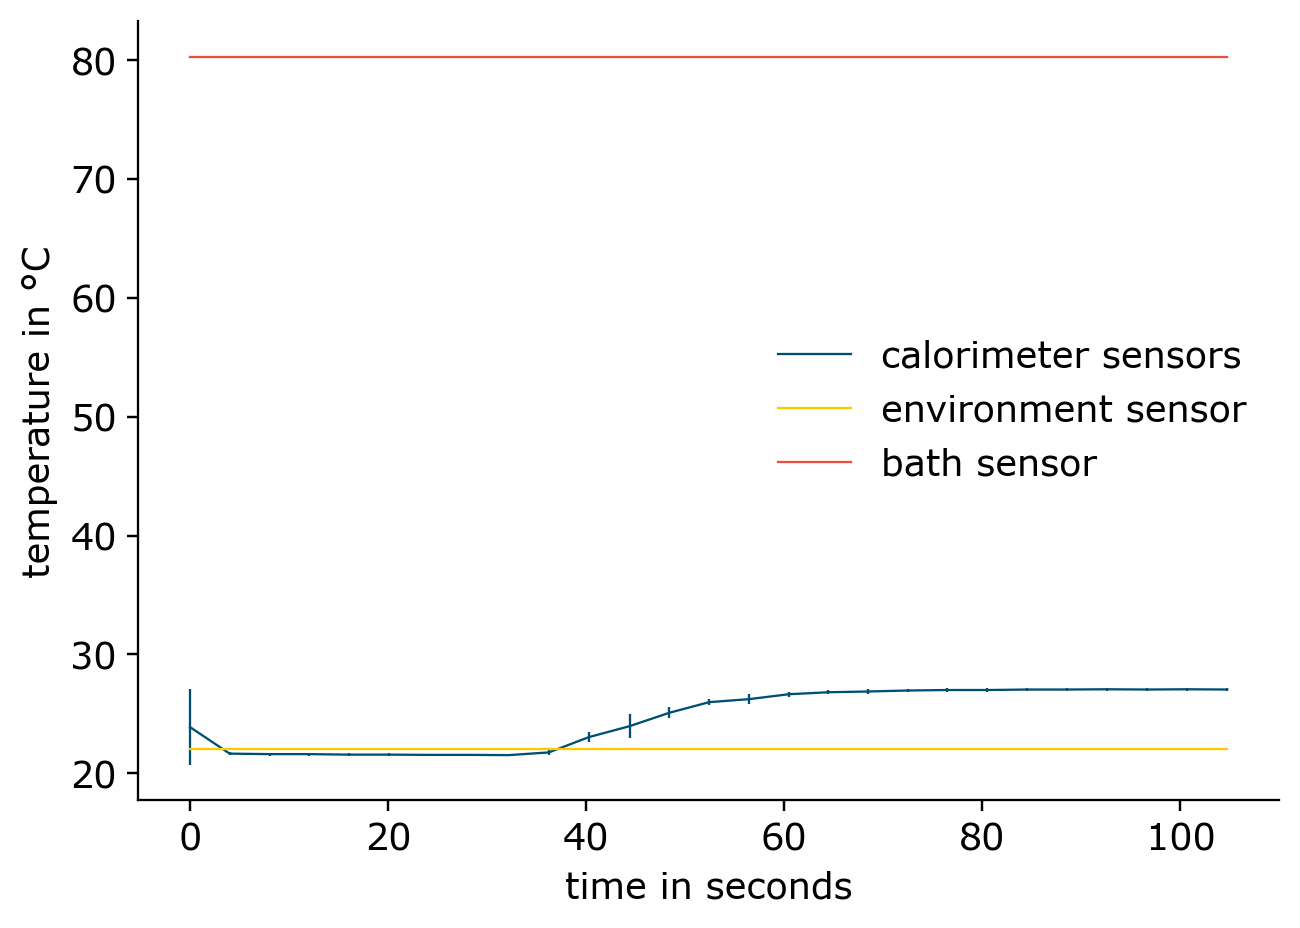

In [67]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
time = data_dict['timestamp']

utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment,mean_std_heater],time[0],['calorimeter sensors','environment sensor','bath sensor'],'time in seconds','temperature in °C')

# DONE #

#### (iv) Metadaten auslesen

In [68]:
# TODO: Read mass of the sample from the metadata of the experiment.

datasheets_path = os.path.join(dir_path,'datasheets')
probe_path = os.path.join(dir_path,'data/pdc016/probe_PDC016_1ee57b3c-b98a-64f2-aea5-ac942cc2bc1b.json')
id = get_id_from_setup.get_id_from_setup(probe_path)

sample_mass = m_json.get_json_entry(datasheets_path,id,['probe','mass','value'])*0.001

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [69]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0]) 

# DONE #

In [70]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][0:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [71]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [72]:
sample_heat_capa

884.1029004463236

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [73]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = os.path.join(dir_path,'data/pdc025/pdc025.h5')

# DONE #

In [74]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3,'RawData')

# DONE #

In [75]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [76]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter[0]:index_calorimeter[-1]+1])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env[0]])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath[0]])


# DONE #

#### (iii) Daten ploten

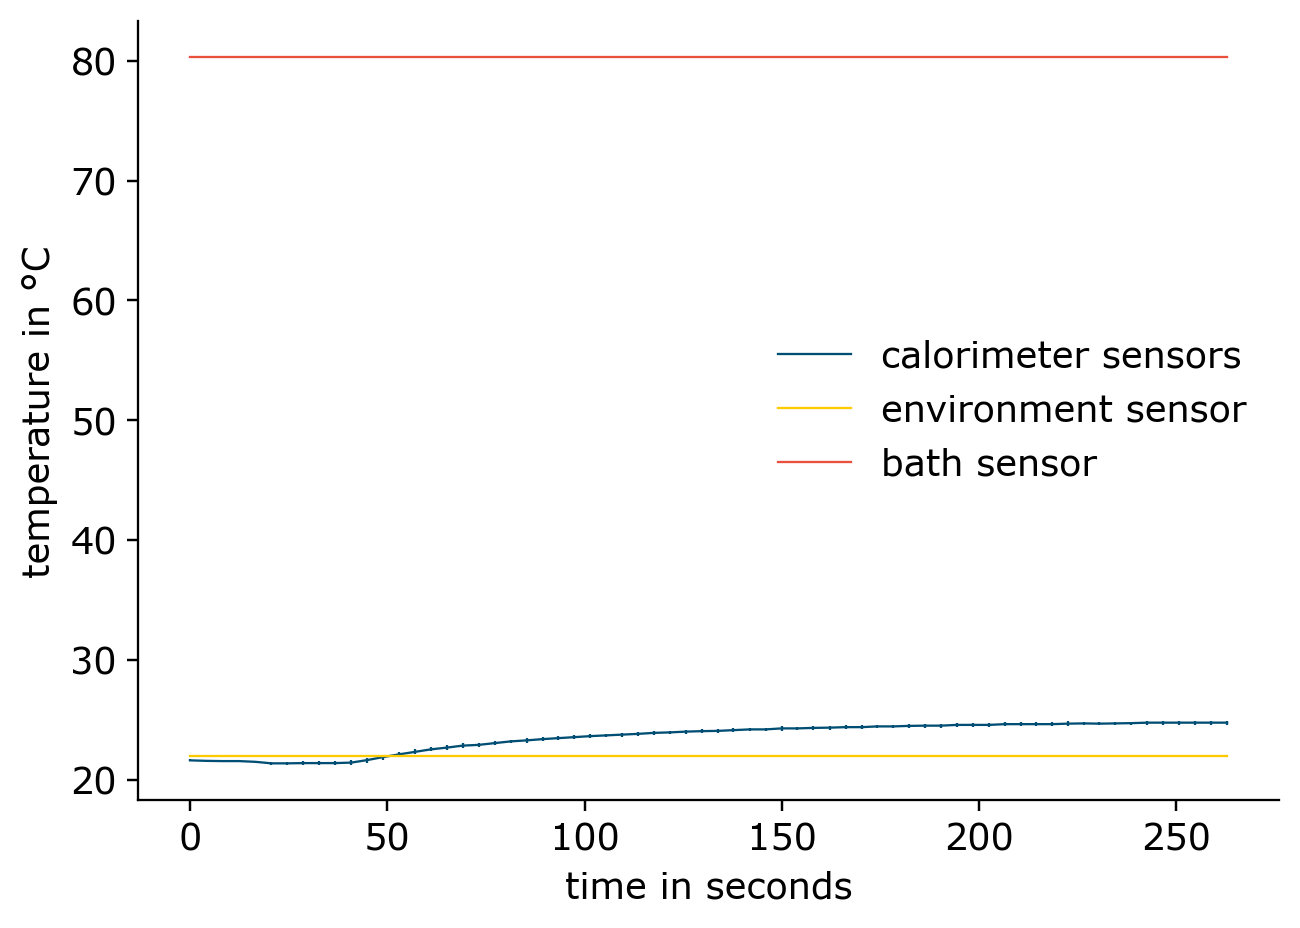

In [77]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

time = data_dict['timestamp']

utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment,mean_std_heater],time[0],['calorimeter sensors','environment sensor','bath sensor'],'time in seconds','temperature in °C')

# DONE #

#### (iv) Metadaten auslesen

In [78]:
# TODO: Read mass of the sample from the metadata of the experiment.

datasheets_path = os.path.join(dir_path,'datasheets')
probe_path = os.path.join(dir_path,'data/pdc025/probe_PDC025_1ee7d446-f66f-659b-997e-0db42fc92959.json')
id = get_id_from_setup.get_id_from_setup(probe_path)

sample_mass = m_json.get_json_entry(datasheets_path,id,['probe','mass','value'])*0.001

print(sample_mass)
# DONE #

0.083


#### (v) Anfangs- und Endwert der Temperatur

In [79]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0]) 

# DONE #

In [80]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][0:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [81]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass*(temperature_start_sample-temperature_mix))


# DONE #

#### (Vii) Ergebnis

In [82]:
sample_heat_capa

1402.8983702296919

## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

Die Wärmekapazitäten der Proben konnten mit diesem Setup sehr gut bestimmt werden. Die spezifische Wärmekapazität der Messingprobe wurde zu $380.92 \frac{J}{kg*K}$ bestimmt. Laut https://de.wikipedia.org/wiki/Messing liegt die spezifische Wärmekapazität von Messing bei etwa $377 \frac{J}{kg*K}$. Für die Aluminiumprobe wurde $884.10 \frac{J}{kg*K}$ gemessen und laut https://de.wikipedia.org/wiki/Aluminium liegt $c_{p,Al}$ bei $897 \frac{J}{kg*K}$. Für die ABS wurde $1404.75 \frac{J}{kg*K}$ gemessen. Laut https://de.wikipedia.org/wiki/Acrylnitril-Butadien-Styrol-Copolymer#Eigenschaften liegt $c_{p,ABS}$ bei $1300 \frac{J}{kg*K}$. Auch wenn die gemessenen Ergebnisse realitätsnah sind, gibt es trotzdem einige Fehlerquellen die zu berücksichtigen sind. Zunächst gibt es die bereits erwähnte Fehlerquelle des mit der Probe der transportierten Wassers. Dadurch wird zusätzliche eine Wärmemenge in das Kalorimeter eingebracht, wodurch die Wärmekapazität fälschlicherweise steigt. Weitere Fehlerquellen sind die begrenzte Genauigkeit der Sensoren sowie die Dauer der Kalorimeter Messung selbst. Auch wenn während den Versuchen die Zeit gestoppt wurde um die Dauer bei allen Messungen möglichst konstant zu halten kann es auch hier zu Abweichungen kommen.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Der Versuch lief gemessen an der Genauigkeit der Messergebnisse gut. Das Versuchsetup war einfach zu bedienen. Da wir allerdings die erste Gruppe waren, welche den Versuch durchgeführt hat, gab es im Vorlauf keine Möglichkeit die Aufgabenstellung einzusehen, da diese noch nicht auf Moodle verfügbar war. Für uns gab es dadurch keine weiteren Schwierigkeiten, da die Zeit für den Versuch ausreichend war. Dennoch fände ich es besser, wenn in Zukunft die Aufgabenstellung etwas frühzeitiger veröffentlicht wird damit man sich im Vorhinein schon besser vorbereiten kann.